# 4. Modelling Data
----------------

In [1]:
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
cdf = pd.read_csv('cdf.csv', index_col=0)
models = []

## 4.1 Split data
I will split data to three sets. 
- First set will be used to train model. 
- Second set will be used to validation model after optimization.
- Third set will be used to test the final form of the model.

In [2]:
from sklearn.model_selection import train_test_split
v_cdf = cdf.values
X = v_cdf[:,1:]
y = v_cdf[:,0]
set_size = 0.2
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=set_size, random_state=seed)

## 4.2 Modelling data with linear regression
Plot showing relation between price and age shows a strict, however, non-linear relation. I check three forms of function describing the price-age relation: 
- linear model:   $price = \alpha + \beta \times age$
- quadratic model:   $\sqrt{price} = \alpha + \beta \times age$
- exponential model:   $\ln(price) = \alpha + \beta \times age$

### 4.2.1 Linear regression without transformation

Coefficient of determination R^2:  0.784078699205


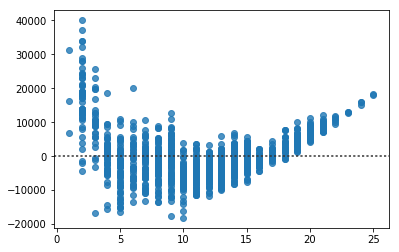

In [3]:
from sklearn.linear_model import LinearRegression
ols_lin = LinearRegression()
ols_lin.fit(X_train[:,6].reshape(-1,1), y_train)
print('Coefficient of determination R^2: ', 
      ols_lin.score(X_test[:,6].reshape(-1,1), y_test))
sns.residplot(X_test[:,6], y_test)
models.append(['Linear regression', 0, 0, ols_lin.score(X_test[:,6].reshape(-1,1), y_test)])

### 4.2.2 Linear regression with square root transformation

Coefficient of determination R^2:  0.877017937393


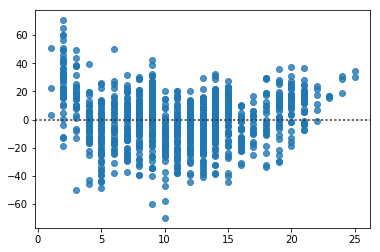

In [5]:
ols_sqr = LinearRegression()
ols_sqr.fit(X_train[:,6].reshape(-1,1), np.sqrt(y_train))
print('Coefficient of determination R^2: ', 
      ols_sqr.score(X_test[:,6].reshape(-1,1), np.sqrt(y_test)))
sns.residplot(X_test[:,6], np.sqrt(y_test))
models.append(['LinReg Square Root Transformation', 0, 0, ols_sqr.score(X_test[:,6].reshape(-1,1), np.sqrt(y_test))])

### 4.2.3 Linear regression with logarithmic transformation

Coefficient of determination R^2:  0.862904525634


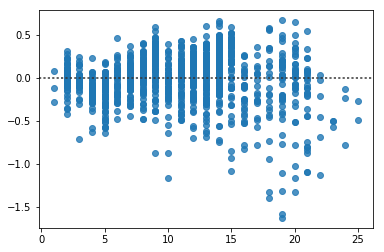

In [6]:
ols_log = LinearRegression()
ols_log.fit(X_train[:,6].reshape(-1,1), np.log(y_train))
print('Coefficient of determination R^2: ', 
      ols_log.score(X_test[:,6].reshape(-1,1), np.log(y_test)))
sns.residplot(X_test[:,6], np.log(y_test))
models.append(['LinReg Logarithmic Transformation', 0, 0, ols_log.score(X_test[:,6].reshape(-1,1), np.log(y_test))])

### 4.2.4 Conlusions
Residual plots for non-transformed and for squre-root transformed regression shows bends. The residual plot for logarithmic transformation looks random. It is confirm in the Price-Age plot, where the exponential curve fit well to data. 

In [34]:
def show_linear_regression_models():
    age = np.linspace(0, 25, 100)
    plt.scatter(X_test[:,6], y_test)
    plt.plot(age, ols_lin.predict(age[:, np.newaxis]), color='g')
    plt.plot(age, np.power(ols_sqr.predict(age[:, np.newaxis]), 2), color='r')
    plt.plot(age, np.exp(ols_log.predict(age[:, np.newaxis])), color='m')
    plt.text(15, 80000, 'Exponential transf.', color='m')
    plt.text(15, 70000, 'Quadratic transf.', color='r')
    plt.text(15, 60000, 'Linear regression', color='g')

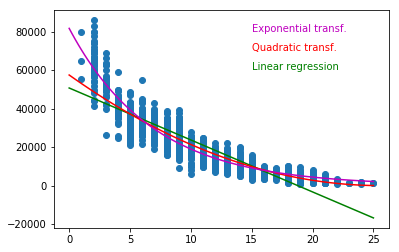

In [35]:
show_linear_regression_models()

Assuming, that the price is described by exponential functio, I can calculate the half-life time for the price. 
The half-life for the car price is:

In [8]:
print('Half-life of car price:', np.log(2)/(-ols_log.coef_)[0], ' yr.')

Half-life of car price: 4.74974227097  yr.


## 4.3 Machine learning models
Above regression model take into account only the price-age relation. Here, I try improve model using the reggresion models from SciKit-Learn and other features.

In [9]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score

### 4.3.1. Random Forest Regressor

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
rfr = RandomForestRegressor()
kfold = KFold(n_splits=10, random_state=seed)
rfr_results = cross_val_score(rfr, X_train, y_train, cv=kfold)
print("%s: %f (%f)" % ('RandomForestRegressor', rfr_results.mean(), rfr_results.std()))
print('Score (R^2 for test data): ', r2_score(y_test, rfr.fit(X_train, y_train).predict(X_test)))
models.append(['Random Forest Regressor', rfr_results.mean(), rfr_results.std(), r2_score(y_test, rfr.fit(X_train, y_train).predict(X_test))])

RandomForestRegressor: 0.950966 (0.004071)
Score (R^2 for test data):  0.949783997889


### 4.3.2. Gradient Boosting Regressor

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

In [15]:
gbr = GradientBoostingRegressor()
kfold = KFold(n_splits=10, random_state=seed)
gbr_results = cross_val_score(gbr, X_train, y_train, cv=kfold)
print("%s: %f (%f)" % ('GradientBoostingRegressor', gbr_results.mean(), gbr_results.std()))
print('Score (R^2 for test data): ', r2_score(y_test, gbr.fit(X_train, y_train).predict(X_test)))
models.append(['Gradient Boosting Regressor', gbr_results.mean(), gbr_results.std(), r2_score(y_test, gbr.fit(X_train, y_train).predict(X_test))])

GradientBoostingRegressor: 0.956867 (0.004361)
Score (R^2 for test data):  0.956789638256


### 4.3.3. AdaBoost

In [16]:
from sklearn.ensemble import AdaBoostRegressor

In [17]:
ada = AdaBoostRegressor()
kfold = KFold(n_splits=10, random_state=seed)
ada_results = cross_val_score(ada, X_train, y_train, cv=kfold)
print("%s: %f (%f)" % ('AdaBoost', ada_results.mean(), ada_results.std()))
print('Score (R^2 for test data): ', r2_score(y_test, ada.fit(X_train, y_train).predict(X_test)))
models.append(['AdaBoost Regressor', ada_results.mean(), ada_results.std(), r2_score(y_test, ada.fit(X_train, y_train).predict(X_test))])

AdaBoost: 0.916933 (0.007799)
Score (R^2 for test data):  0.910733072782


### 4.3.4 Support Verctor Regressor (with 'rdf' kernel)

In [18]:
from sklearn.svm import SVR

In [19]:
svr = SVR()
kfold = KFold(n_splits=10, random_state=seed)
svr_results = cross_val_score(svr, X_train, y_train, cv=kfold)
print("%s: %f (%f)" % ('SVR: ', svr_results.mean(), svr_results.std()))
print('Score (R^2 for test data): ', r2_score(y_test, svr.fit(X_train, y_train).predict(X_test)))
models.append(['Support Vector Machine Regressor', svr_results.mean(), svr_results.std(), r2_score(y_test, svr.fit(X_train, y_train).predict(X_test))])

SVR: : -0.117005 (0.020184)
Score (R^2 for test data):  -0.110357501342


### 4.3.5 Neural Network Regressor

In [20]:
from sklearn.neural_network import MLPRegressor

In [21]:
mlpr = MLPRegressor()
kfold = KFold(n_splits=10, random_state=seed)
mlpr_results = cross_val_score(mlpr, X_train, y_train, cv=kfold)
print("%s: %f (%f)" % ('Neural Network', mlpr_results.mean(), mlpr_results.std()))
print('Score (R^2 for test data): ', r2_score(y_test, mlpr.fit(X_train, y_train).predict(X_test)))
models.append(['Simple Neural Network', mlpr_results.mean(), mlpr_results.std(), r2_score(y_test, mlpr.fit(X_train, y_train).predict(X_test))])

Neural Network: 0.561958 (0.048580)
Score (R^2 for test data):  0.650800952194


## 4.4 Improving Best Model
Below, I present the summary of current models.

In [22]:
pd.DataFrame(models, columns=['Model name', 'CV mean', 'CV std', 'R2 for test set'])

,Model name,CV mean,CV std,R2 for validation set
0,Linear regression,0.000000,0.000000,0.784079
1,LinReg Square Root Transformation,0.000000,0.000000,0.877018
2,LinReg Logarithmic Transformation,0.000000,0.000000,0.862905
3,Random Forest Regressor,0.950966,0.004071,0.950439
4,Gradient Boosting Regressor,0.956867,0.004361,0.956911
5,AdaBoost Regressor,0.916933,0.007799,0.913599
6,Support Vector Machine Regressor,-0.117005,0.020184,-0.110358
7,Simple Neural Network,0.561958,0.048580,0.641130


Two models stand out: Random Forest Regressor and Gradient Boosting Regressor. I will conduct tuning of the hyper-parameters of these models.

In [23]:
from sklearn.model_selection import GridSearchCV

### 4.4.1 Tuning the Random Forest Regressor

In [24]:
params_rfr = {  'bootstrap' : (True, False), 
                'max_features' : ('sqrt','log2','auto'),
                'n_estimators': (10, 25, 50, 100, 250, 500),
                'min_samples_split':(2,6,8,12,16)}
gscv_rfr = GridSearchCV(RandomForestRegressor(), cv = 3, param_grid = params_rfr, n_jobs=-1)
gscv_rfr.fit(X_train, y_train)
print('Bets hyper-parameters:', gscv_rfr.best_params_)
print('R^2 score: ', r2_score(y_test, gscv_rfr.predict(X_test)))

Bets hyper-parameters: {'n_estimators': 250, 'min_samples_split': 6, 'max_features': 'sqrt', 'bootstrap': False}
R^2 score:  0.955999459943


### 4.4.2 Tuning the Gradient Boosting Regressor

In [25]:
params_gbr = {  'loss' : ('ls', 'lad', 'huber', 'quantile'),
                'learning_rate' : (0.01, 0.03, 0.1, 0.3), 
                'max_features' : ('sqrt','log2','auto'),
                'n_estimators': (10, 25, 50, 100, 250, 500),
                'min_samples_split':(2,6,8,12,16)}
gscv_gbr = GridSearchCV(GradientBoostingRegressor(), cv = 3, param_grid = params_gbr, n_jobs=-1)
gscv_gbr.fit(X_train, y_train)
print('Bets hyper-parameters:', gscv_gbr.best_params_)
print('R^2 score: ', r2_score(y_test, gscv_gbr.predict(X_test)))

Bets hyper-parameters: {'n_estimators': 500, 'max_features': 'sqrt', 'learning_rate': 0.1, 'loss': 'ls', 'min_samples_split': 12}
R^2 score:  0.95784661096


### 4.4.3 Final model
Tuning of the hyper-parameters confirm that Gradient Boosting Regressor is slightly better (has grater R2 score) than Random Forest Regressor. The final model will be fitted on extended train set, i.e. x_train + x_valid.

In [28]:
final_model = GradientBoostingRegressor(**gscv_gbr.best_params_)
final_model.fit(X_train, y_train)
print('Final model: ', r2_score(y_test, final_model.predict(X_test)))

Final model:  0.958290940628


In [36]:
models.append(['Final Model - GBR', 0, 0, r2_score(y_test, final_model.predict(X_test))])